In [43]:

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import requests
import zipfile
import io


pd.set_option('display.max_columns', None)

# Load the Data


In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"


response = requests.get(url)
file = zipfile.ZipFile(io.BytesIO(response.content))

file.extractall()

In [16]:
df = pd.read_csv("./bank-additional/bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
df.shape

(41188, 21)

# Pre-Processing


In [18]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print(len(cat_cols) + len(num_cols))

21


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## 1. Check the Dublication and remove it if it exists


In [20]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


## 2. Handling the Null


In [24]:
df.isnull().sum().reset_index()

,index,0
0,age,0
1,job,0
2,marital,0
3,education,0
4,default,0
5,housing,0
6,loan,0
7,contact,0
8,month,0
9,day_of_week,0


## 3. Some Visualizations that help us understand the data


### 3.1 For categorical Data


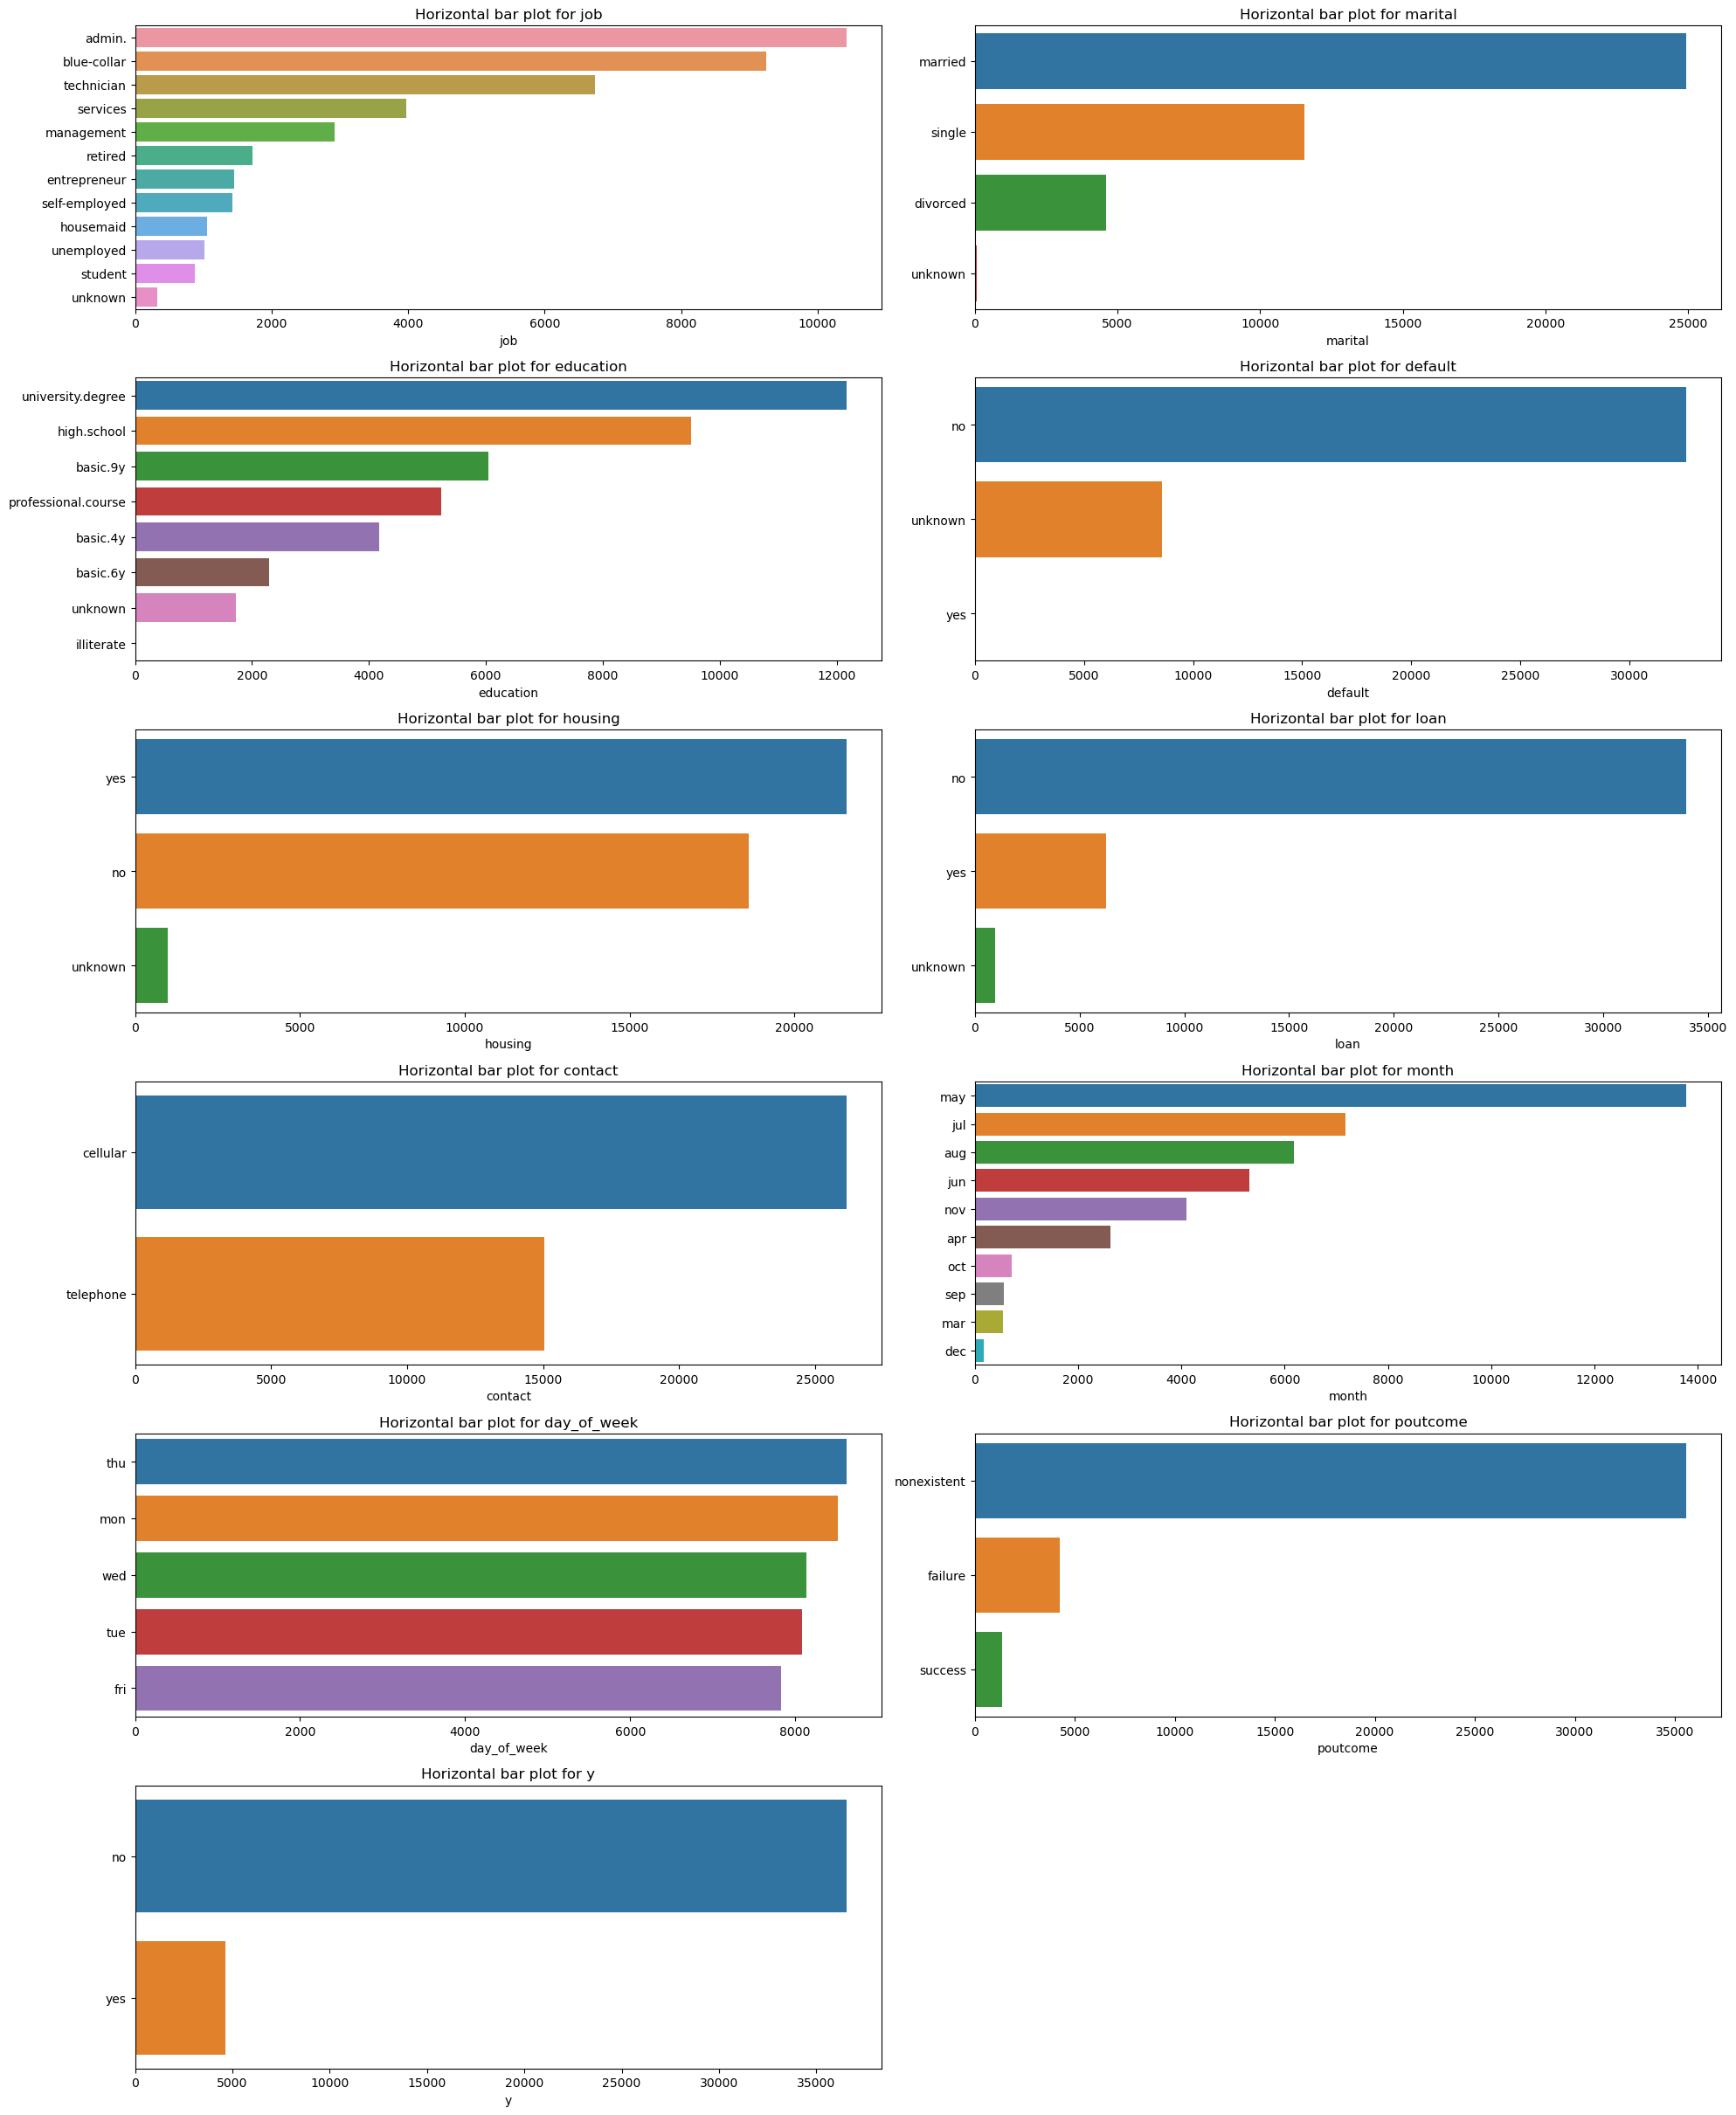

In [65]:
def plot_categorical_columns(df, categorical_columns):
    n = len(categorical_columns)
    ncols = 2
    nrows = 10

    fig, axs = plt.subplots(nrows, ncols, figsize=(10*ncols, 4*nrows))

    for ax, col in zip(np.ravel(axs), categorical_columns):
        sns.barplot(y=df[col].value_counts().index,
                    x=df[col].value_counts(), ax=ax)
        ax.set_title(f'Horizontal bar plot for {col}')

    for ax in np.ravel(axs)[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


plot_categorical_columns(df, cat_cols)

the data is impalanced


### For numerical Data


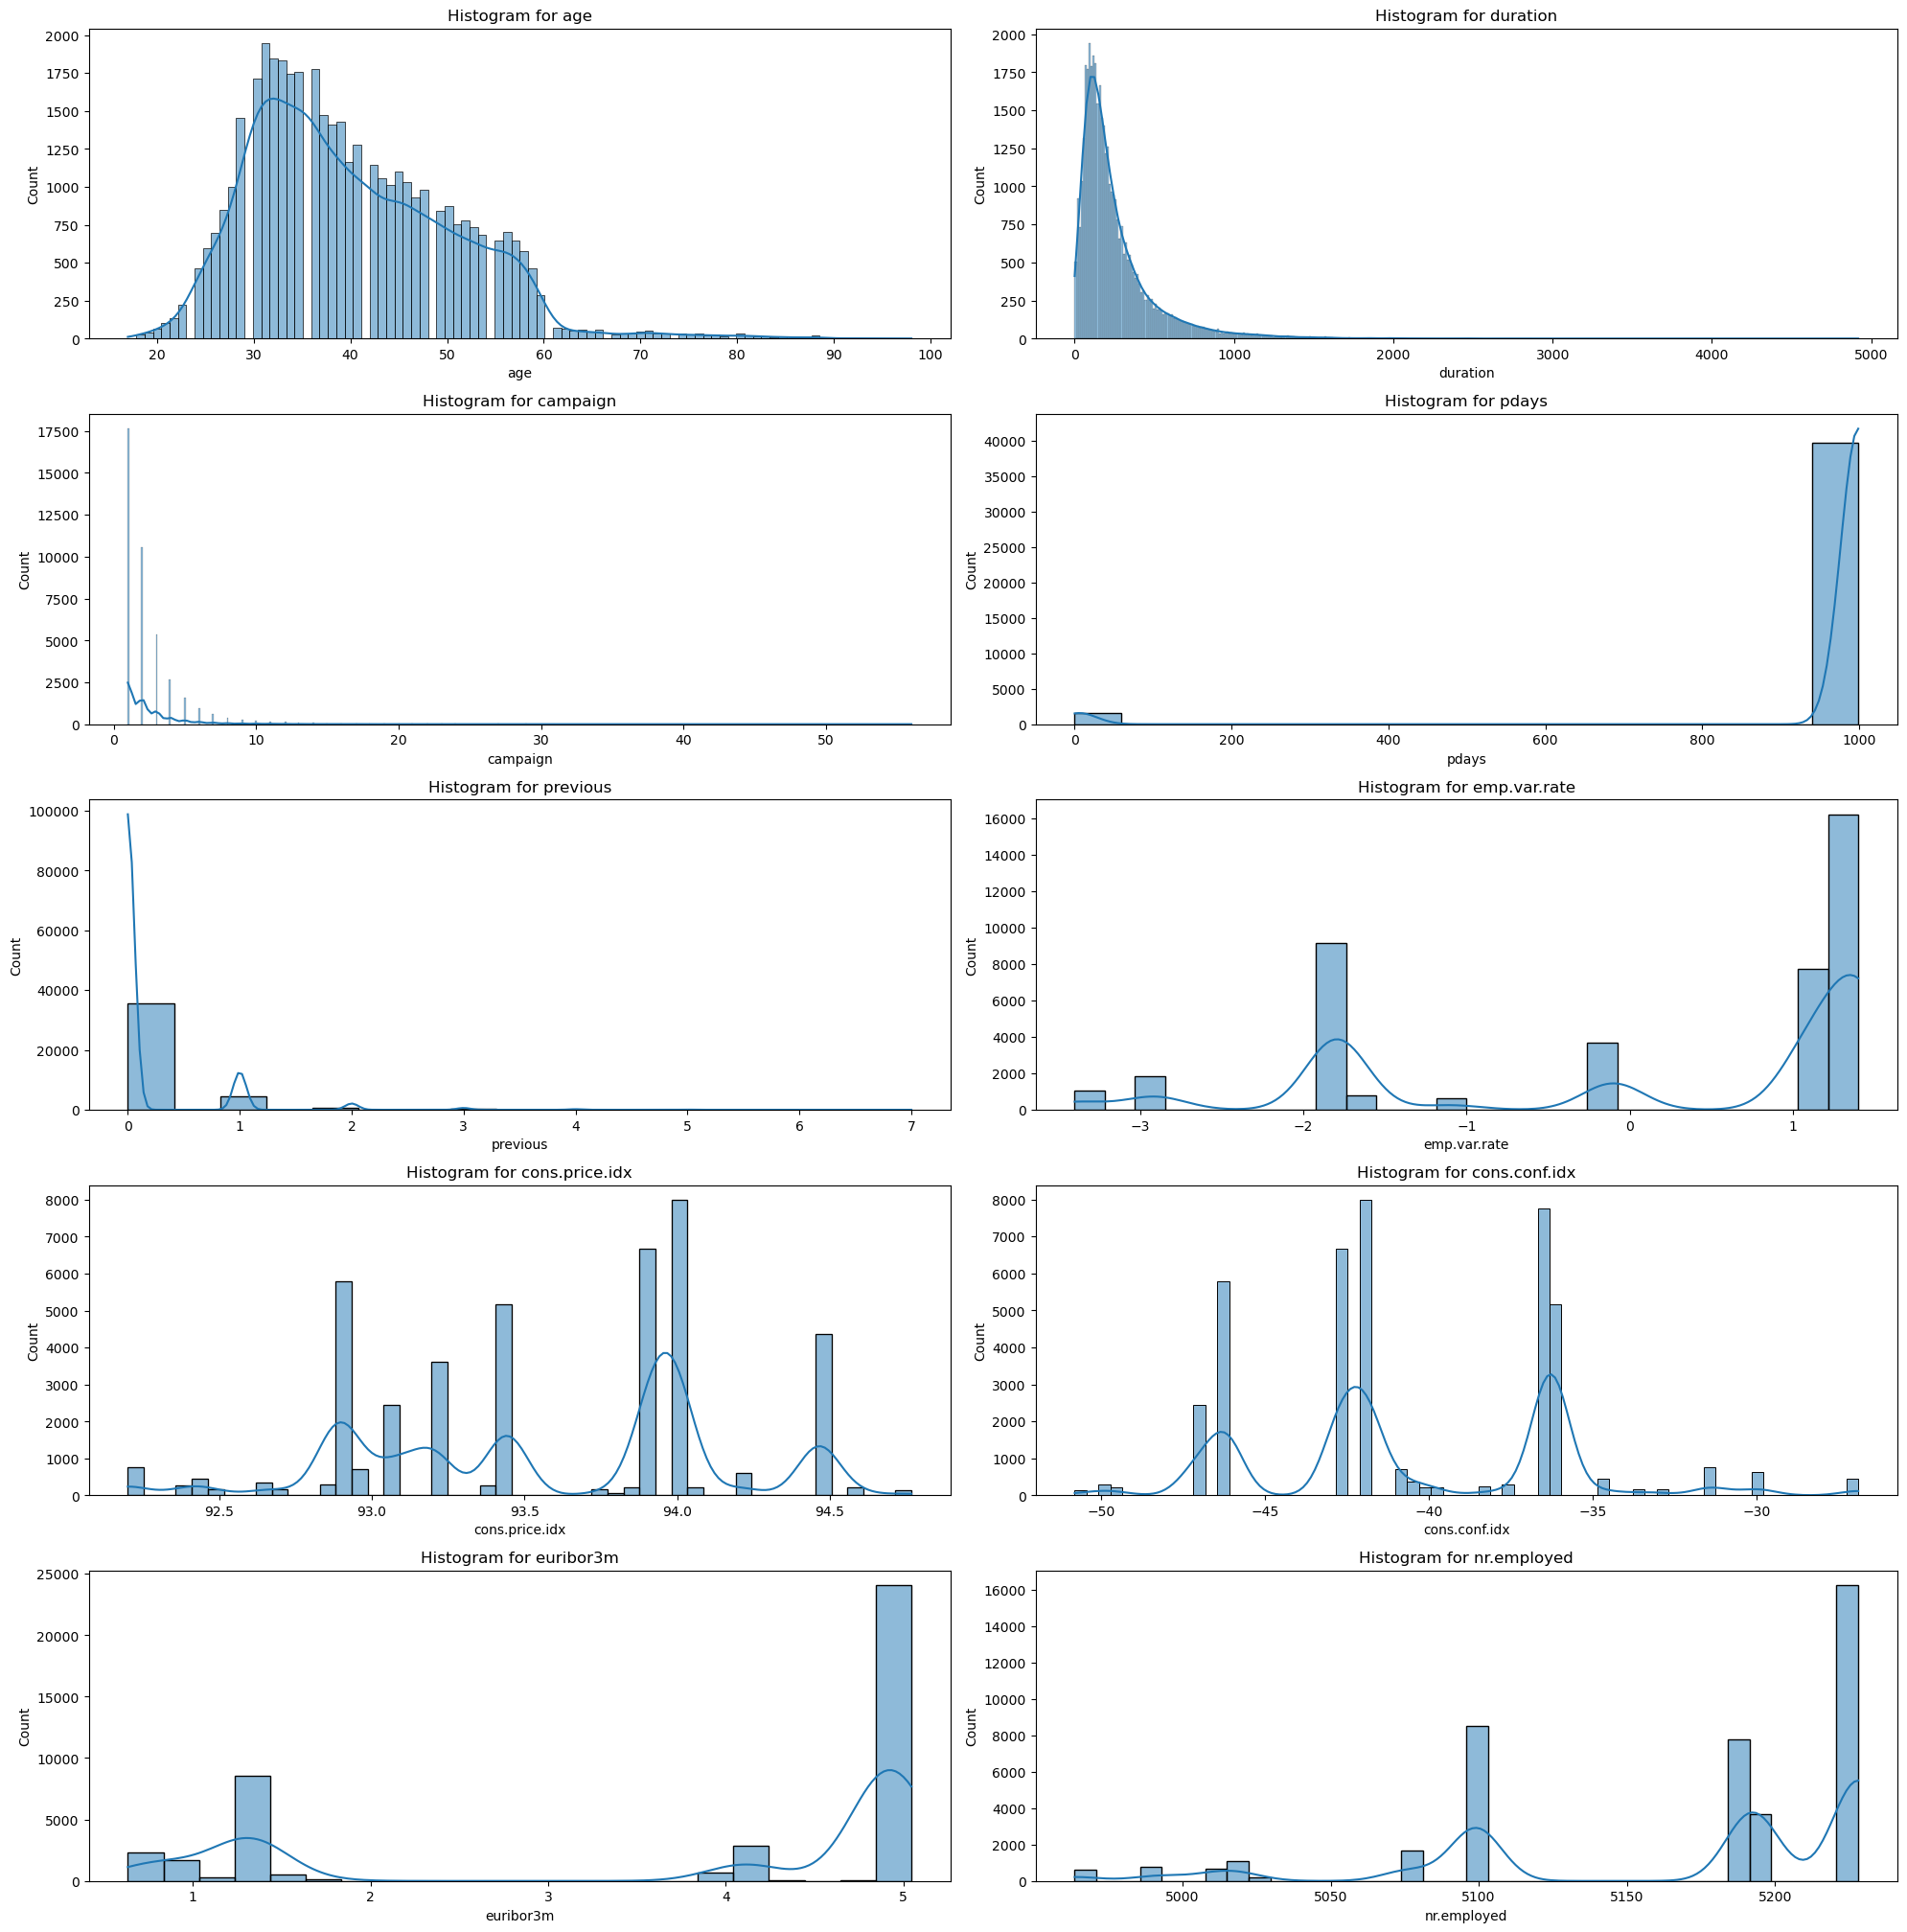

In [66]:
def plot_numerical_columns(df, numerical_columns):
    n = len(numerical_columns)
    ncols = 2
    nrows = 12

    fig, axs = plt.subplots(nrows, ncols, figsize=(10*ncols, 4*nrows))

    for ax, col in zip(np.ravel(axs), numerical_columns):
        sns.histplot(df[col], ax=ax, kde=True)
        ax.set_title(f'Histogram for {col}')

    for ax in np.ravel(axs)[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


plot_numerical_columns(df, num_cols)

## 4. Dropping any column which has 80% of values with the same value


In [ ]:
train_data.groupby(['GarageQual'])['Id'].count(
).reset_index().rename(columns={'Id': 'count'}).sort_values(['count'], ascending=False).iloc[0, 1]

In [88]:
def find_dominant_value_columns(dataframe: pd.DataFrame, list_cols: list, key: str, threshold=0.80):

    dominant_value_cols = []
    max_count = []
    try:
        for cols in list_cols:
            max_value = dataframe.groupby([cols])[key].count().reset_index().rename(
                columns={'index': 'count'}).sort_values(['count'], ascending=False).iloc[0, 1]
            if max_value >= threshold * len(dataframe):
                dominant_value_cols.append(cols)
                max_count.append(max_value)
        return {'list': dominant_value_cols, 'max_count': max_count}
    except:
        return {'list': "The list is empty", 'max_count': None}

In [89]:
dominant_cat = df[cat_cols].copy()
dominant_cat = dominant_cat.reset_index()

In [108]:
dominant_num = df[num_cols].copy()
dominant_num = dominant_num.reset_index()

In [90]:
find_dominant_value_columns(dominant, cat_cols, 'index')

{'list': ['loan', 'poutcome', 'y'], 'max_count': [33938, 35551, 36537]}

In [109]:
find_dominant_value_columns(dominant_num, num_cols, 'index')

{'list': ['pdays', 'previous'], 'max_count': [39661, 35551]}

We will drop the `loan` and `poutcome`


In [91]:
df = df.drop(columns=['loan', 'poutcome'])

In [110]:
df = df.drop(columns=['pdays', 'previous'])

In [94]:
df.head(3)

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


## 5. Multicolinearity (corr > 0.7)


In [95]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [96]:
len(cat_cols) + len(num_cols)

19

In [98]:
df[num_cols].corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


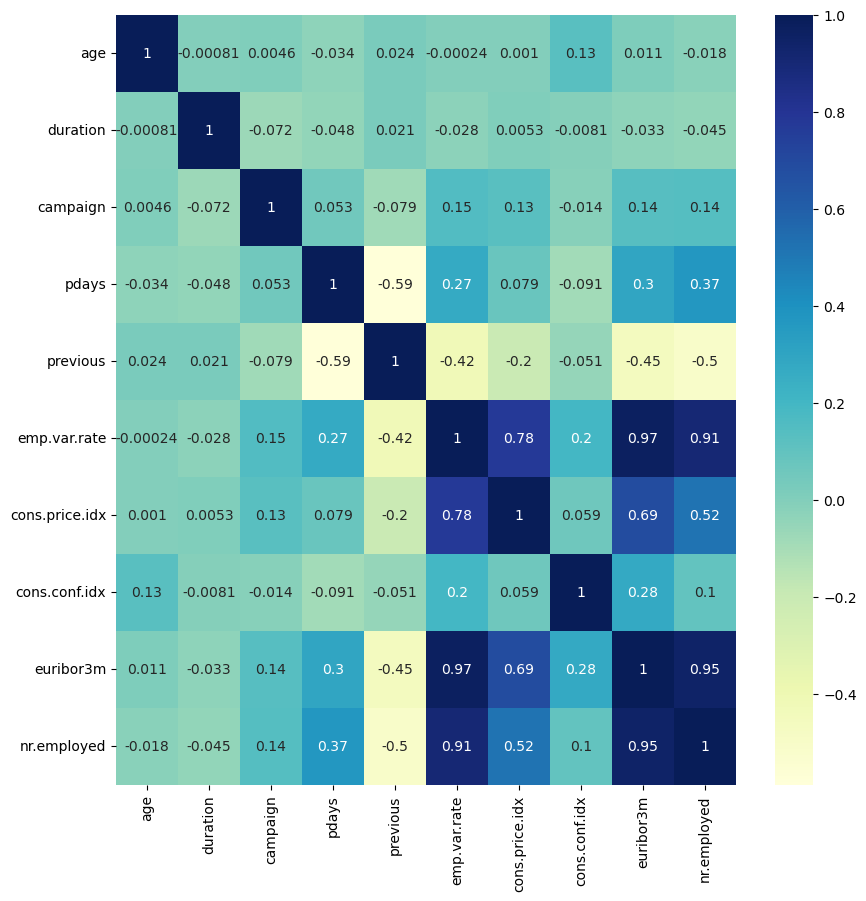

In [99]:
plt.figure(figsize=(10, 10))

dfplot = sns.heatmap(df[num_cols].corr(), cmap="YlGnBu", annot=True)

In [100]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

drop: `nr.employed`, `euribor3m`, `cons.conf.idx` + based on bank-additional-names(the line 11) we will drop `duration`


In [101]:
df = df.drop(columns=['cons.conf.idx', 'euribor3m', 'nr.employed', 'duration'])

In [122]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [112]:
df.head()

,age,job,marital,education,default,housing,contact,month,day_of_week,campaign,emp.var.rate,cons.price.idx,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,1.1,93.994,no
1,57,services,married,high.school,unknown,no,telephone,may,mon,1,1.1,93.994,no
2,37,services,married,high.school,no,yes,telephone,may,mon,1,1.1,93.994,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,1.1,93.994,no
4,56,services,married,high.school,no,no,telephone,may,mon,1,1.1,93.994,no


## 6. Handling the unknow values


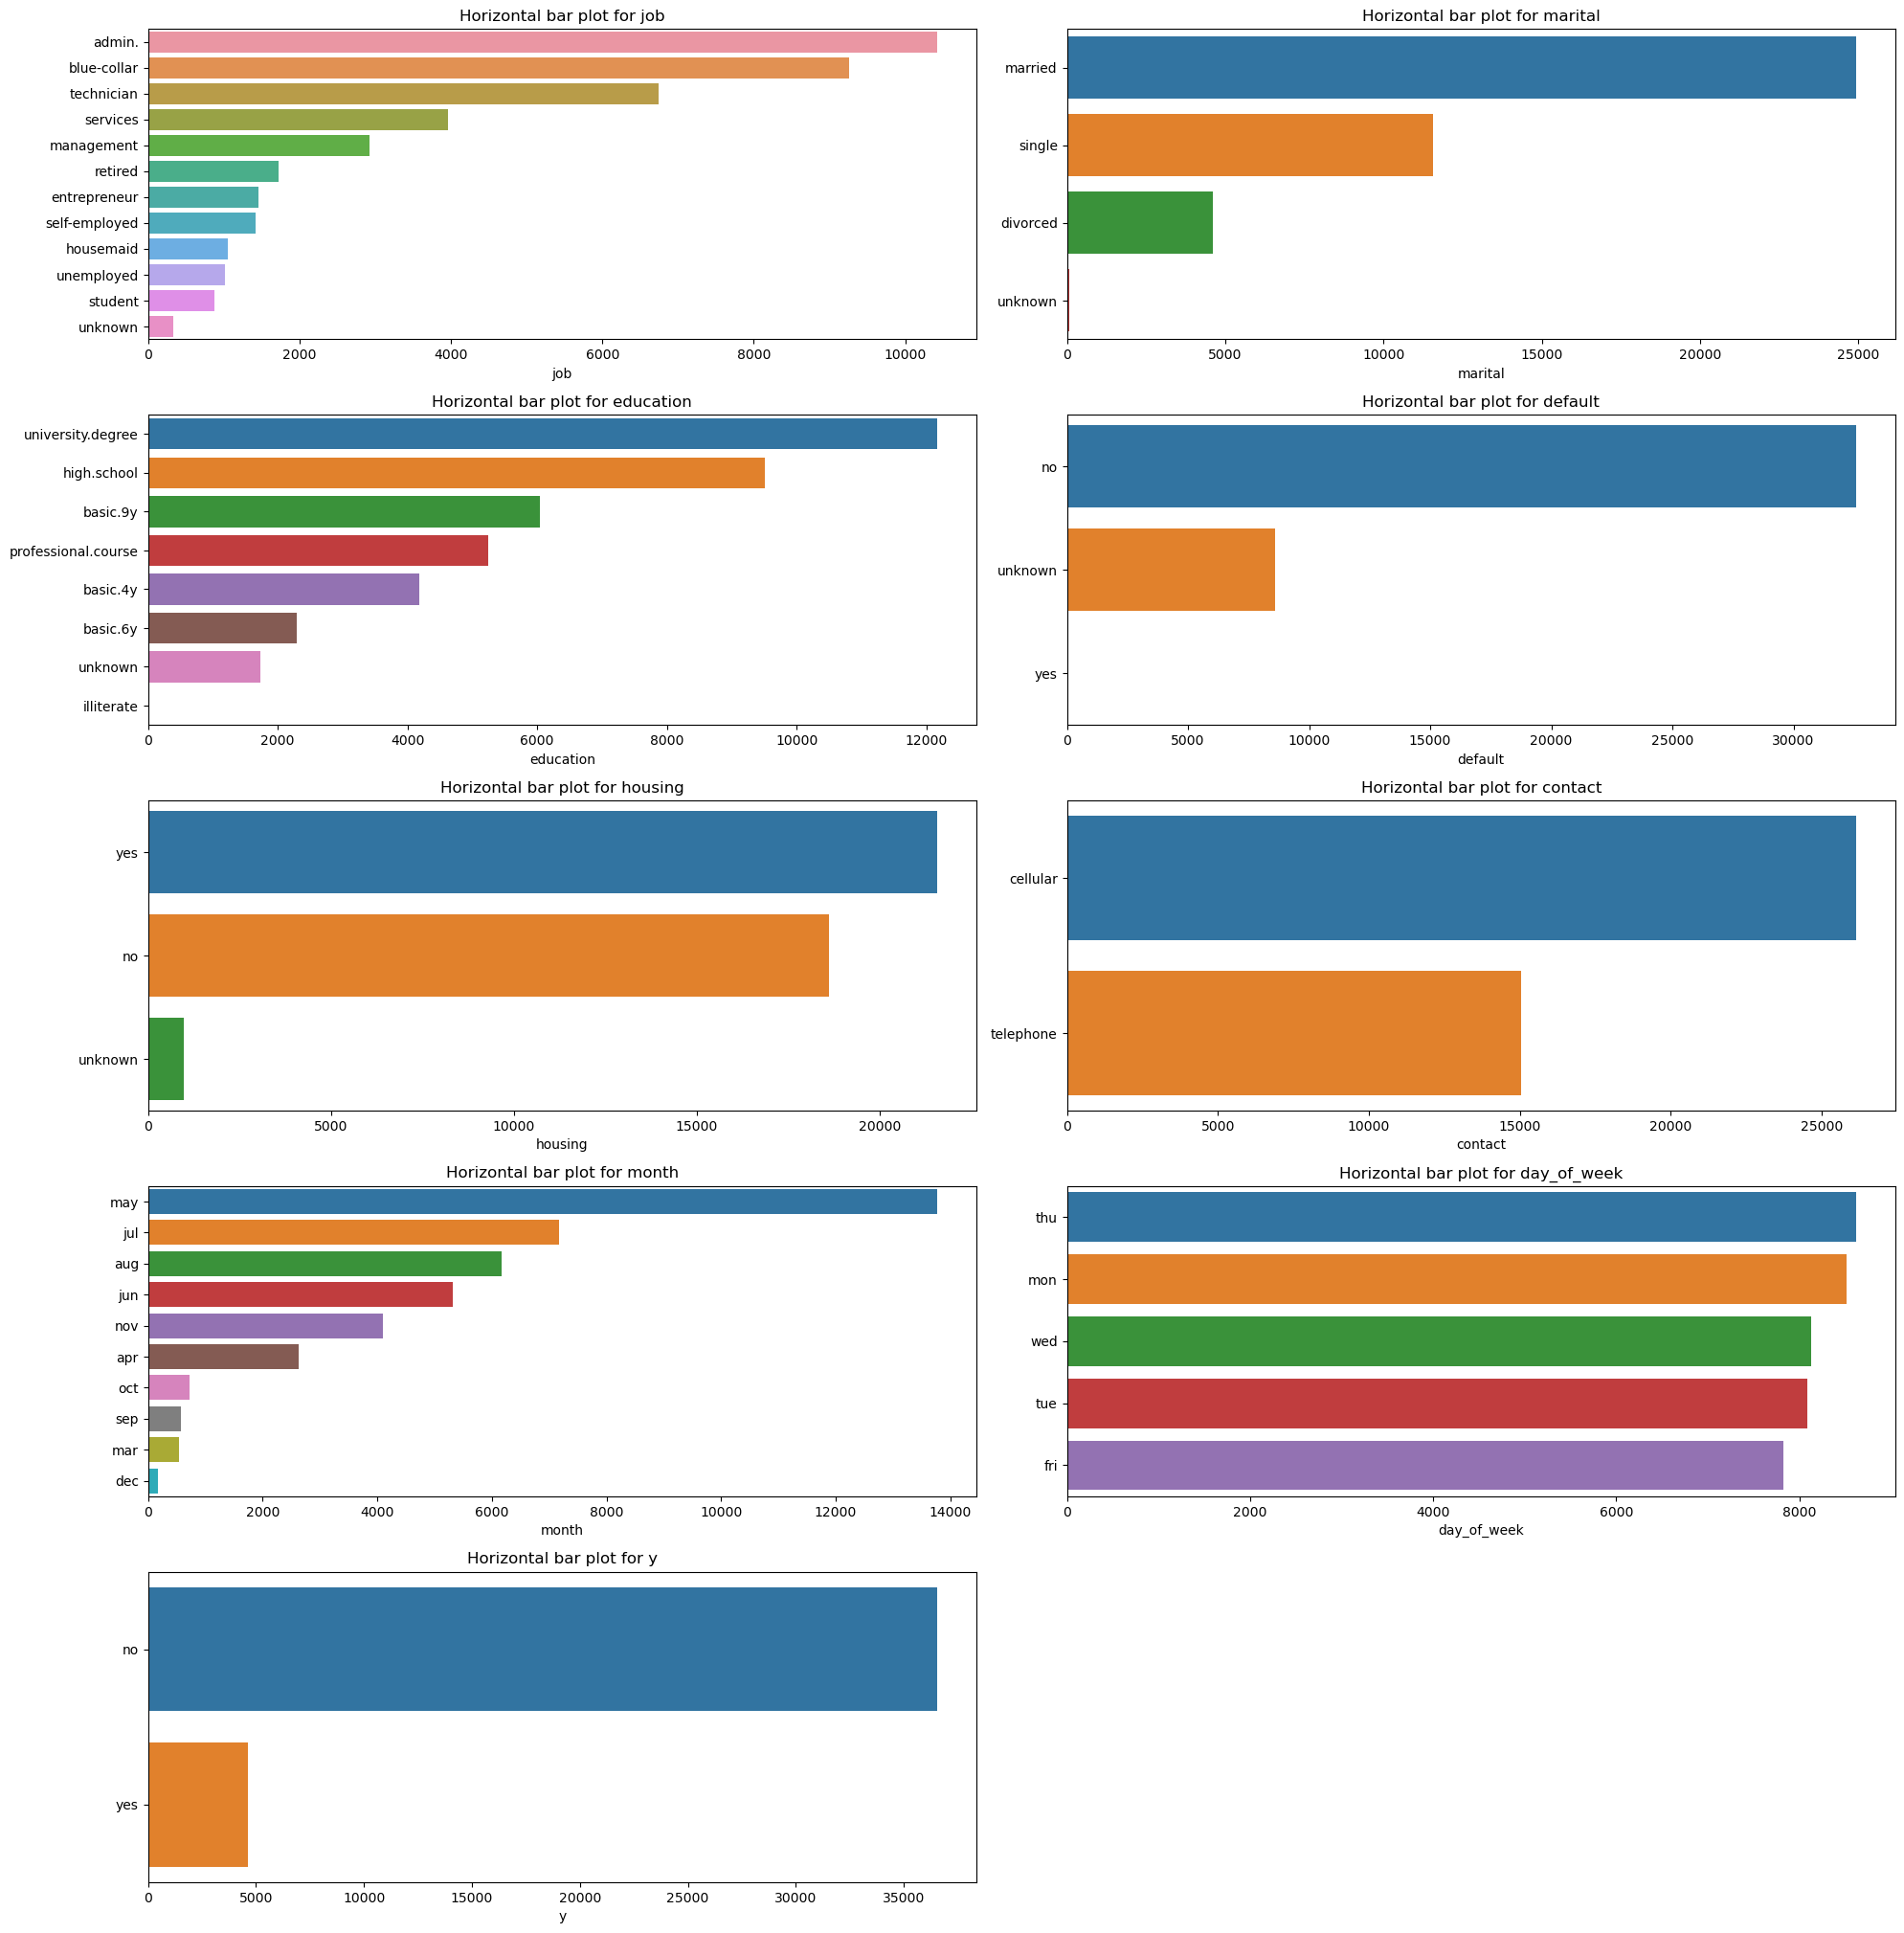

In [114]:
plot_categorical_columns(df, cat_cols)

In [116]:
df = df.drop(columns=['default'])

In [117]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'contact', 'month',
       'day_of_week', 'y'],
      dtype='object')

In [118]:
def replace_unknown_with_mode(df, cat_cols):
    for col in cat_cols:
        mode = df[col].mode()[0]
        df[col] = df[col].replace('unknown', mode)
    return df


df = replace_unknown_with_mode(df, ['job', 'marital', 'education', 'housing'])

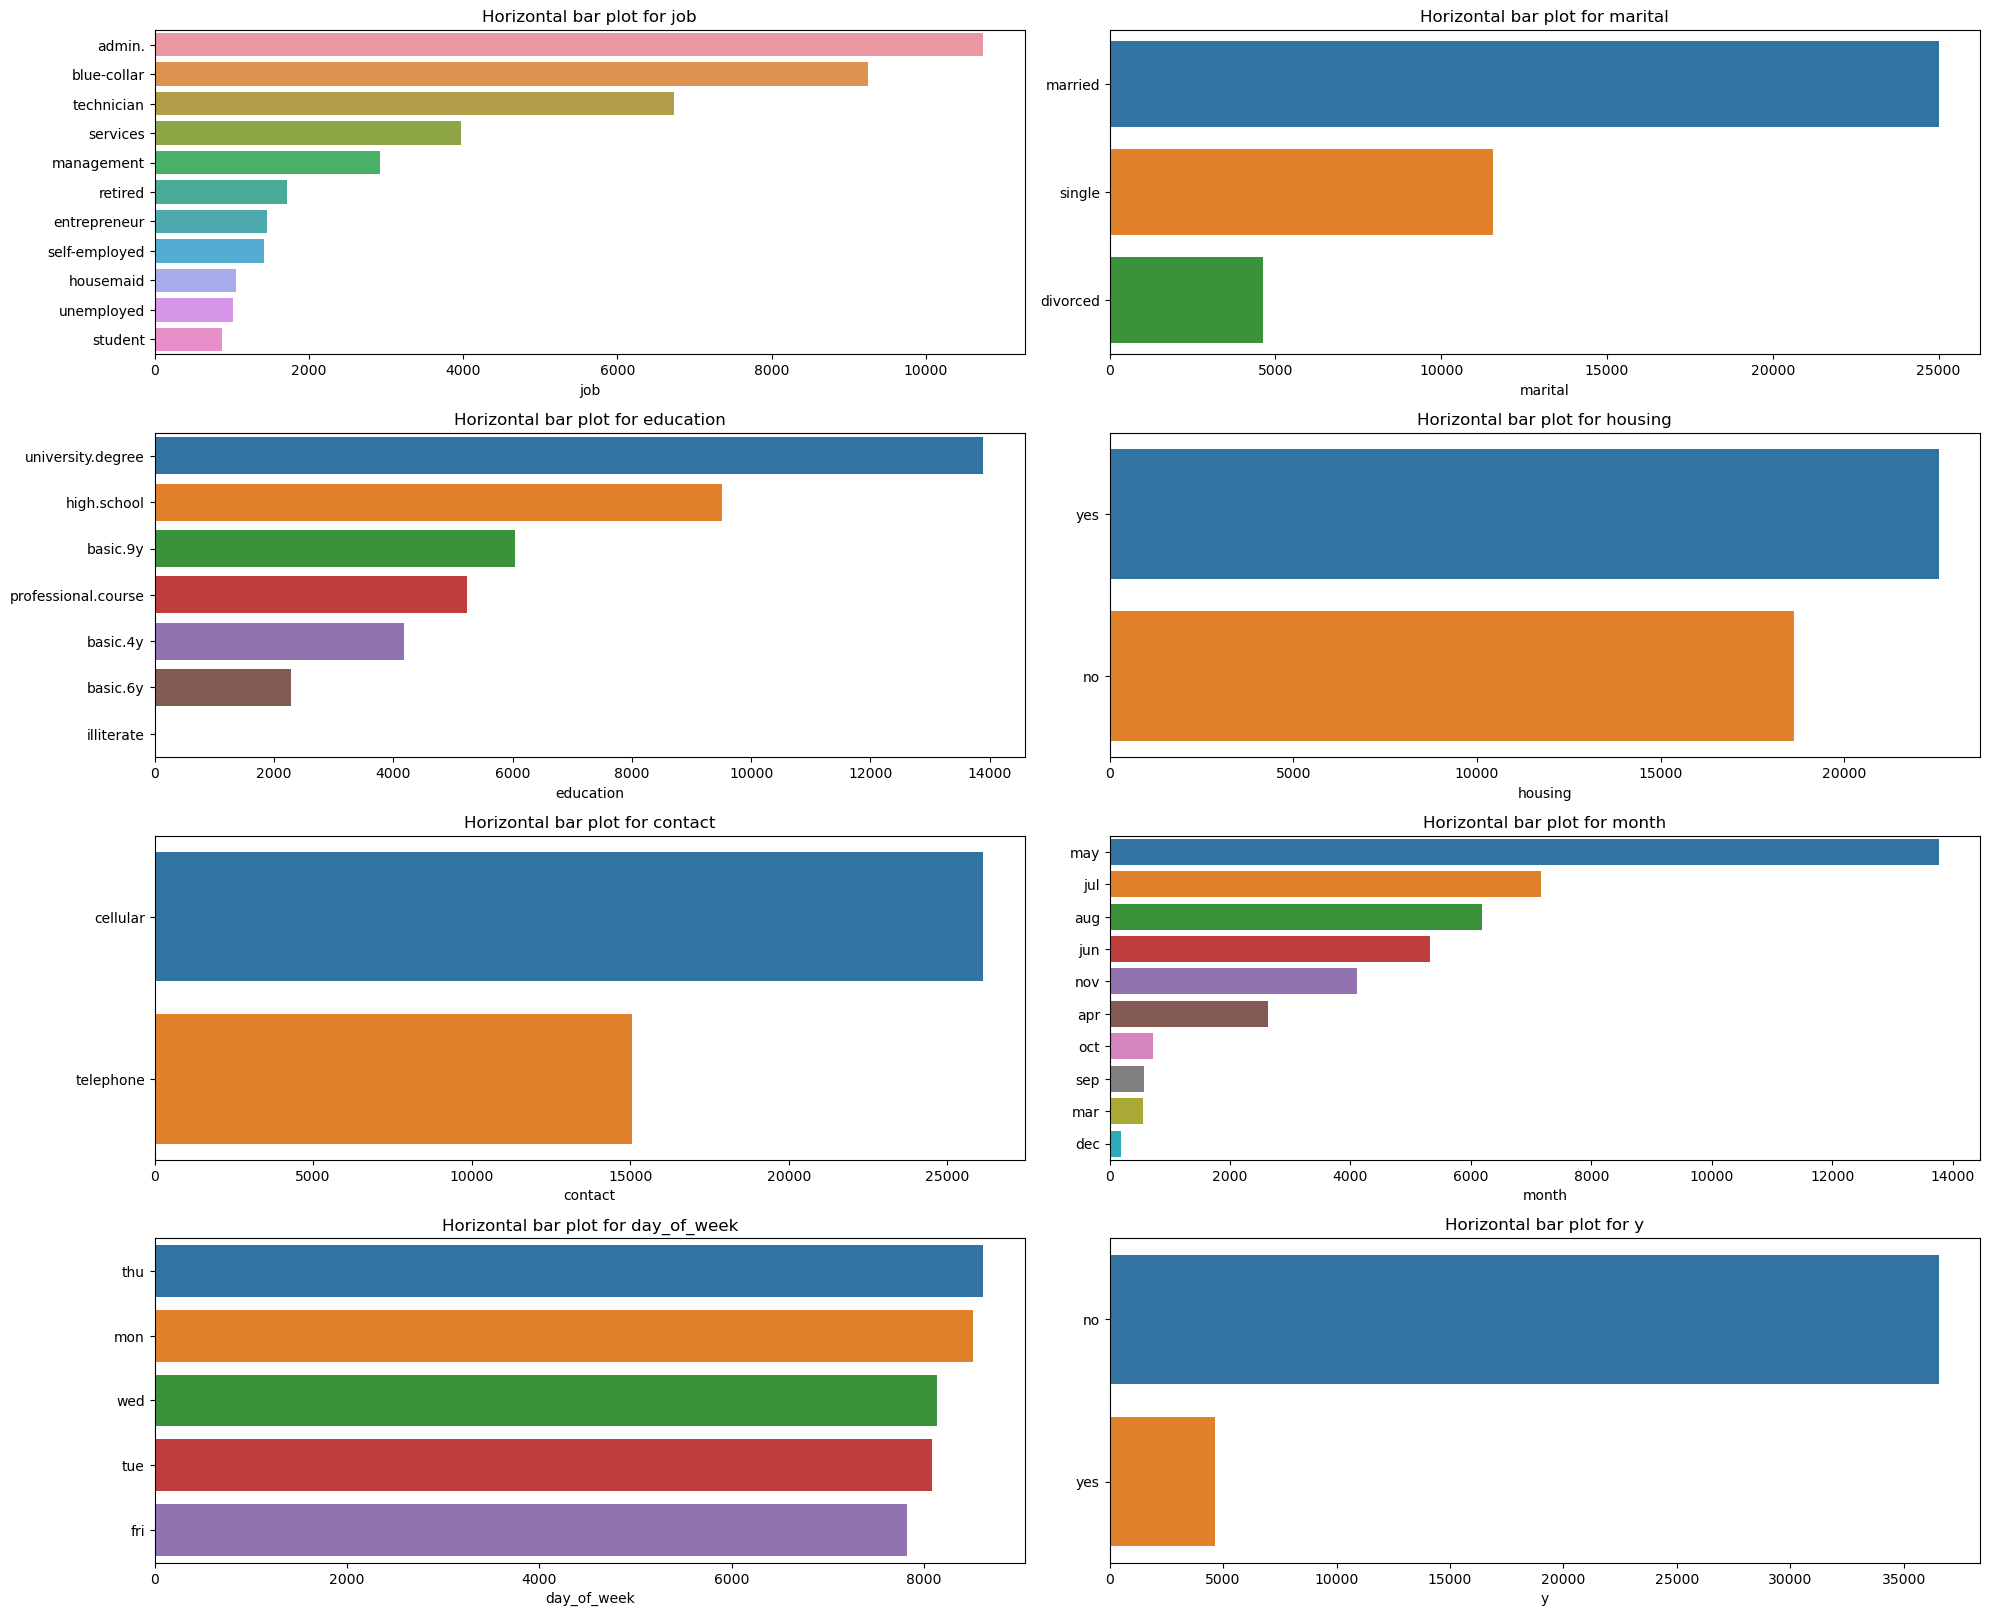

In [123]:
plot_categorical_columns(df, cat_cols)

## 7. If the data follwing normal distribution or NOT !!


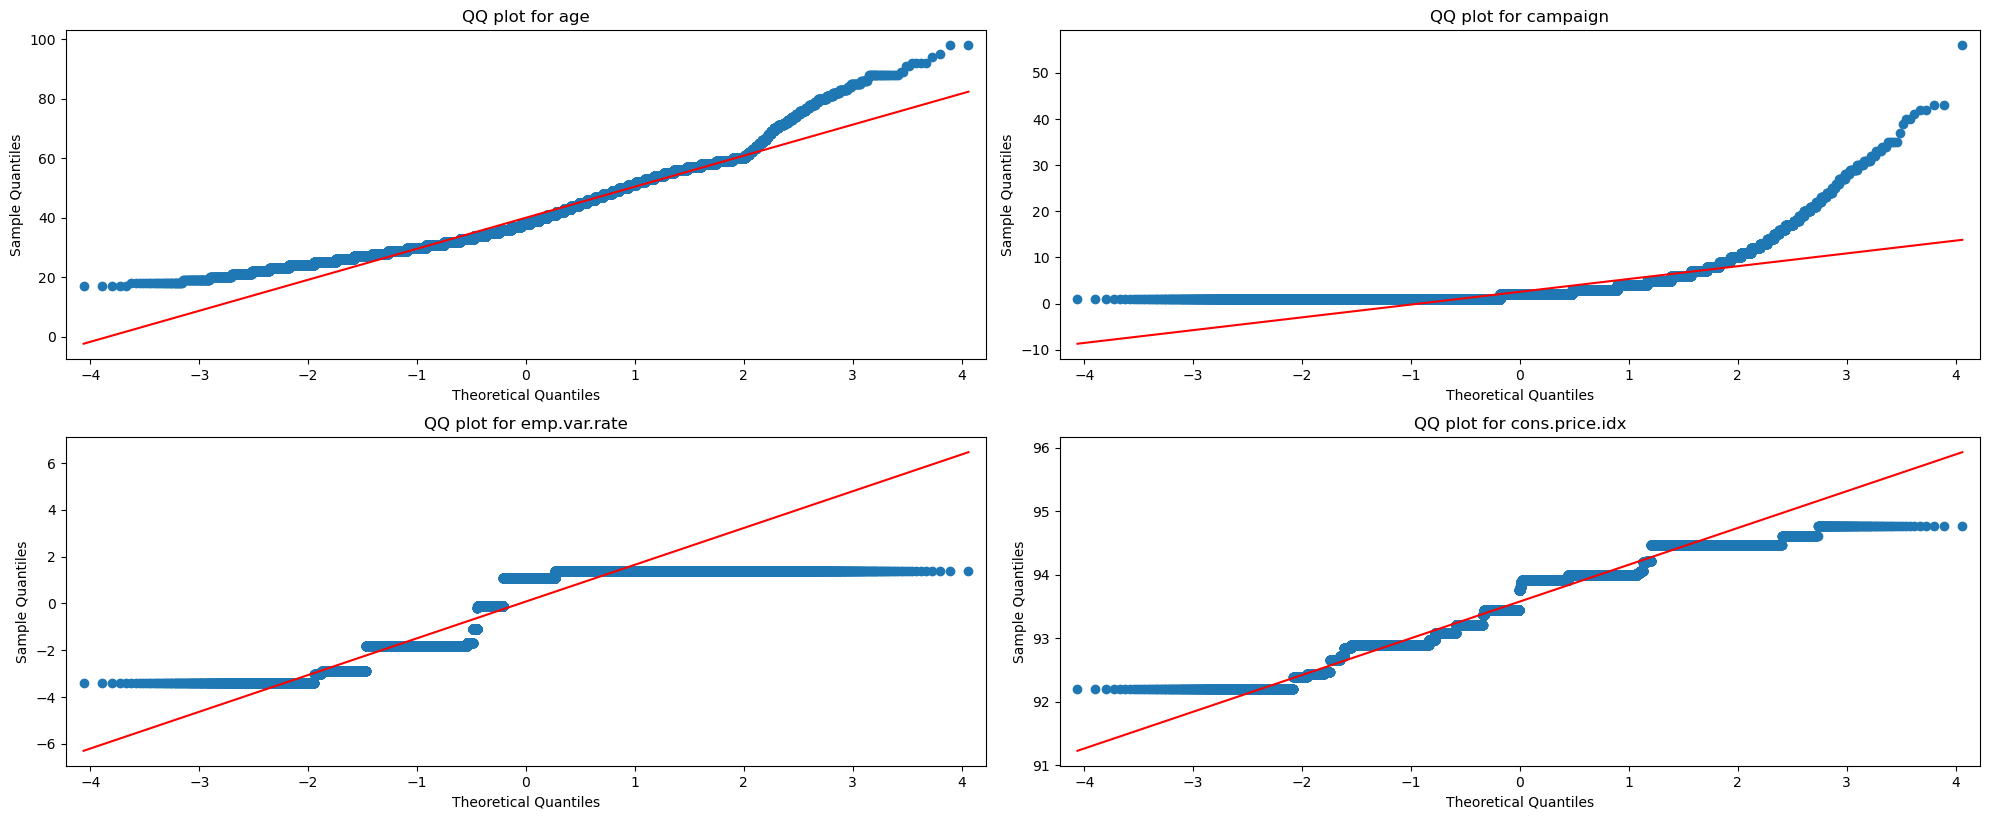

In [125]:
def qq_plot(df, numerical_columns):
    n = len(numerical_columns)
    ncols = 2
    nrows = 4

    fig, axs = plt.subplots(nrows, ncols, figsize=(10*ncols, 4*nrows))

    for ax, col in zip(np.ravel(axs), numerical_columns):
        sm.qqplot(df[col].dropna(), line='s', ax=ax)
        ax.set_title(f'QQ plot for {col}')

    for ax in np.ravel(axs)[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


qq_plot(df, num_cols)